# Predictive Health Assessment: Leveraging DHS Data for Targeted Interventions in Kenya


**Authors**: [Alpha Guya](mailto:alpha.guya@student.moringaschool.com), [Ben Ochoro](mailto:ben.ochoro@student.moringaschool.com), [Caleb Ochieng](mailto:caleb.ochieng@student.moringaschool.com), [Christine Mukiri](mailto:christine.mukiri@student.moringaschool.com), [Dominic Muli](mailto:dominic.muli@student.moringaschool.com), [Frank Mandele](mailto:frank.mandele@student.moringaschool.com), [Jacquiline Tulinye](mailto:jacquiline.tulinye@student.moringaschool.com) and [Lesley Wanjiku](mailto:lesley.wanjiku@student.moringaschool.com)

## 1.0) Project Overview

Our project focuses on using machine learning techniques and data sourced from the Demographic and Health Surveys (DHS) program to generate predictive models aimed at evaluating individual and household health risks in Kenya. By analyzing various set of demographic, socio-economic, and health-related indicators, we target to develop reliable predictive models capable of estimating the likelihood of malnutrition, disease prevalence, and various health risks within certain communities. The goal is to provide users such as public health officials with targeted insights. This will enable more effective allotment of resources and interventions. This proactive approach is geared to optimize the impact of health initiatives, allowing for the prioritization and customization of interventions to at risk populations, ultimately contributing to the improvement of health outcomes in Kenya.

## 1.1) Business Problem

Despite existing health interventions, Kenya encounters difficulties in effectively targeting resources and interventions. This will help to address individual and household health risks, including malnutrition, diseases, and other health concerns. This fault highlights the need for a predictive and targeted approach to allocate resources and interventions more effectively. Leveraging machine learning models built upon Demographic and Health Surveys (DHS) data, the project aims to develop predictive models capable of assessing the likelihood of malnutrition, disease prevalence, and health risks based on individual and household characteristics. By accurately identifying at-risk populations, this solution seeks to empower decision-makers and public health officials to allocate resources on need basis, ultimately increasing the impact of health interventions and improving overall health outcomes in Kenya.

## 1.2) Objectives


Based on the data provided by DHS(Demographic and Health Surveys) , some of the objectives include:

* To analyze trends in health indicators over time.

* To predict Health Risks based on individual and household characteristics. 

* To find the relationship between the most common diseases and the demographic.

*  To Build predictive models to estimate health outcomes based on various demographic and socio-economic factors.

*  To identify regional variations in health indicators.

* To Identify factors contributing to changes in health outcomes.

* To Conduct comprehensive feature engineering to extract relevant features from DHS data, considering demographic, socio-economic, and health-related variables.


### API Deployment and Usability

Deploy an accessible API interface for stakeholders to input data and receive health risk predictions based on the developed models.

### Recommendations and Conclusion
* Targeted Intervention Recommendations:

Utilize model predictions to generate targeted recommendations for health interventions and resource allocation in specific Kenyan communities.

* Impact Assessment and Validation:

Assess the real-world impact of model-guided interventions by monitoring and evaluating changes in health outcomes in targeted Kenyan populations.

## 1.3) Metric of Success

* Achieve a predictive accuracy of at least 90% on unseen validation data.
* Identify and utilize the top 10 most influential features contributing to the models' predictive power.
* Generate clear and interpretable explanations for at least 70% of model predictions.
* Create a prioritized list of actionable recommendations based on identified health risks for at least 100 of communities.
* Ensure an API uptime of at least 90% and gather feedback on usability for further improvements.
* Measure the effectiveness of interventions by observing changes in health indicators, aiming for improvements in at least 80% of targeted communities.

## 1.4) Data Relevance and Validation

The data available is relevant for the intended analysis and predictions

## 2.0) Understanding the Data

The data for this project is obtained from the [DHS Program website](https://dhsprogram.com/data/dataset/Kenya_Standard-DHS_2022.cfm?flag=0).
The encoding for this dataset is explained [here](./Recode7_DHS_10Sep2018_DHSG4.pdf).

## 2.1) Reading the Data

### 2.1.1) Installations

In [1]:
# installations
%pip install pyreadstat
%pip install --upgrade openpyxl

                                              0.0/2.4 MB ? eta -:--:--
                                              0.0/2.4 MB 1.4 MB/s eta 0:00:02
     -                                        0.1/2.4 MB 656.4 kB/s eta 0:00:04
     -                                        0.1/2.4 MB 751.6 kB/s eta 0:00:04
     --                                       0.1/2.4 MB 774.0 kB/s eta 0:00:03
     --                                       0.2/2.4 MB 751.6 kB/s eta 0:00:03
     ---                                      0.2/2.4 MB 734.2 kB/s eta 0:00:04
     ----                                     0.3/2.4 MB 853.3 kB/s eta 0:00:03
     -----                                    0.3/2.4 MB 873.8 kB/s eta 0:00:03
     ------                                   0.4/2.4 MB 946.4 kB/s eta 0:00:03
     --------                                 0.5/2.4 MB 994.4 kB/s eta 0:00:02
     ----------                               0.6/2.4 MB 1.1 MB/s eta 0:00:02
     -----------                              0.7/2.4

### 2.1.2) Importing Relevant Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadstat
import warnings
warnings.filterwarnings("ignore")

### 2.1.3) Reading the Data

Observation: we will work with

In [3]:
# Reading downloaded relevant data
df, meta = pyreadstat.read_sav("KEHR8BFL.SAV")

In [4]:
df

,HHID,HV000,HV001,HV002,HV003,HV004,HV005,HV006,HV007,HV008,...,SH305E$02,SH305E$03,SH305E$04,SH305E$05,SH305E$06,SH305E$07,SH305E$08,SH305E$09,SH305E$10,SH305E$11
0,1 4,KE8,1.0,4.0,2.0,1.0,1306431.0,4.0,2022.0,1468.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1 7,KE8,1.0,7.0,2.0,1.0,1306431.0,4.0,2022.0,1468.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1 10,KE8,1.0,10.0,1.0,1.0,1306431.0,4.0,2022.0,1468.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1 13,KE8,1.0,13.0,4.0,1.0,1306431.0,4.0,2022.0,1468.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1 17,KE8,1.0,17.0,1.0,1.0,1306431.0,4.0,2022.0,1468.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37906,1692 77,KE8,1692.0,77.0,2.0,1692.0,7456997.0,5.0,2022.0,1469.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37907,1692 80,KE8,1692.0,80.0,2.0,1692.0,7456997.0,5.0,2022.0,1469.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37908,1692 84,KE8,1692.0,84.0,2.0,1692.0,7456997.0,5.0,2022.0,1469.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37909,1692 88,KE8,1692.0,88.0,2.0,1692.0,7456997.0,5.0,2022.0,1469.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2.2) Data Cleaning

In [5]:
# Replacing empty(missing values) with NaN
df.replace(' ',np.nan, inplace=True)
df.replace("",np.nan, inplace=True)

In [6]:
# Calculating the threshold for 80% empty columns
threshold = 0.8 * len(df)

# Dropping columns with 80% or more empty values
df_cleaned = df.dropna(axis=1, thresh=threshold)

# Displaying the cleaned DataFrame
df_cleaned

,HHID,HV000,HV001,HV002,HV003,HV004,HV005,HV006,HV007,HV008,...,HML16$01,HML16$02,HML17$01,HML17$02,HML19$01,HML19$02,HML20$01,HML20$02,IDXDIS$01,IDXDIS$02
0,1 4,KE8,1.0,4.0,2.0,1.0,1306431.0,4.0,2022.0,1468.0,...,34.0,34.0,1.0,3.0,0.0,0.0,1.0,1.0,1.0,2.0
1,1 7,KE8,1.0,7.0,2.0,1.0,1306431.0,4.0,2022.0,1468.0,...,38.0,38.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
2,1 10,KE8,1.0,10.0,1.0,1.0,1306431.0,4.0,2022.0,1468.0,...,33.0,11.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0
3,1 13,KE8,1.0,13.0,4.0,1.0,1306431.0,4.0,2022.0,1468.0,...,46.0,39.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0
4,1 17,KE8,1.0,17.0,1.0,1.0,1306431.0,4.0,2022.0,1468.0,...,36.0,31.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37906,1692 77,KE8,1692.0,77.0,2.0,1692.0,7456997.0,5.0,2022.0,1469.0,...,54.0,20.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
37907,1692 80,KE8,1692.0,80.0,2.0,1692.0,7456997.0,5.0,2022.0,1469.0,...,58.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
37908,1692 84,KE8,1692.0,84.0,2.0,1692.0,7456997.0,5.0,2022.0,1469.0,...,39.0,36.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
37909,1692 88,KE8,1692.0,88.0,2.0,1692.0,7456997.0,5.0,2022.0,1469.0,...,37.0,33.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0


In [7]:
# Checking percentage of missing values
def missing_values_summary(df):
    """
    Generate a summary of missing values for each column in a DataFrame.

    Parameters:
    - df: pandas DataFrame

    Returns:
    - DataFrame containing columns with NaN values and their percentages
    """

    # Checking percentage of missing values
    nan_info = df.isna().sum()
    nan_percentage = (nan_info / len(df)) * 100

    # Creating a DataFrame with columns and their NaN percentages
    nan_df = pd.DataFrame({'Column': nan_info.index, 'NaN Count': nan_info.values, 'NaN Percentage': nan_percentage.values})

    # Filtering columns with NaN values
    columns_with_nan = nan_df[nan_df['NaN Count'] > 0]

    return columns_with_nan


# Calling the function on df_cleaned
result = missing_values_summary(df_cleaned)
result

,Column,NaN Count,NaN Percentage
35,HV045A,1,0.002638
36,HV045B,3,0.007913
37,HV045C,3,0.007913
38,HV046,3,0.007913
41,HV802,3,0.007913
42,HV803,3,0.007913
54,HV213,4,0.010551
55,HV214,4,0.010551
56,HV215,4,0.010551
64,HV225,3849,10.152726


In [8]:
# Saving column names into an Excel file

# Getting the column names
column_names = df_cleaned.columns

# Creating a DataFrame with a single column containing the column names
column_names_df = pd.DataFrame(column_names, columns=["Column Names"])

# Specifying the Excel file path
excel_file_path = 'column_names.xlsx'

# Writing the DataFrame to the Excel file
column_names_df.to_excel(excel_file_path, index=False)

In [9]:
# Converting column names to labels dictionary to a DataFrame
labels_df = pd.DataFrame(list(meta.column_names_to_labels.items()), columns=['Column Name', 'Label'])

# Saving the DataFrame to an Excel file
excel_file_path = 'column_names_to_labels.xlsx'
labels_df.to_excel(excel_file_path, index=False)

In [10]:
# Converting Coded column names into readable column names

# Loading the Excel file with the column names into a Pandas DataFrame
excel_file_path = 'column_names_dictionary.xlsx'
df_excel = pd.read_excel(excel_file_path, sheet_name='Sheet1')

# Displaying the original DataFrame with the column headers
print("Original Excel DataFrame:")
print(df_excel)

# Replacing the column headers using a for loop
for old_header, new_header in zip(df_cleaned.columns, df_excel['Label Names']):
    df_cleaned.rename(columns={old_header: new_header}, inplace=True)

# Displaying the DataFrame with the updated column headers
df_cleaned

Original Excel DataFrame:
    Column Names                 Label Names  \
0           HHID                Household_ID   
1          HV000                Country_Code   
2          HV001             Cluster_number    
3          HV002            Household_number   
4          HV003  Respondent's_ line_number    
..           ...                         ...   
206       SH135D             rd_injury_count   
207       SH135F            covid_test_count   
208       SH135J           covid_death_count   
209       SH135L            covid_vacc_count   
210     HV107$01            edu_yr_completed   

                                           Description  
0    Case identification uniquely identifies each h...  
1    Alphabetic country code to identify the survey...  
2    Cluster number is the number identifying the s...  
3    Household number is the number identifying the...  
4    Respondent's line number is the line number in...  
..                                                 ... 

,Household_ID,Country_Code,Cluster_number,Household_number,Respondent's_ line_number,Area_unit,Sample_weight,Month_of_the_household_interview,Year_of_the_household_interview,Month_Date_of_household_Interview,...,owns_goats,Owns_Sheep,Owns_Poultry,Owns_Cs,rd_death_count,rd_injury_count,covid_test_count,covid_death_count,covid_vacc_count,edu_yr_completed
0,1 4,KE8,1.0,4.0,2.0,1.0,1306431.0,4.0,2022.0,1468.0,...,34.0,34.0,1.0,3.0,0.0,0.0,1.0,1.0,1.0,2.0
1,1 7,KE8,1.0,7.0,2.0,1.0,1306431.0,4.0,2022.0,1468.0,...,38.0,38.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
2,1 10,KE8,1.0,10.0,1.0,1.0,1306431.0,4.0,2022.0,1468.0,...,33.0,11.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0
3,1 13,KE8,1.0,13.0,4.0,1.0,1306431.0,4.0,2022.0,1468.0,...,46.0,39.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0
4,1 17,KE8,1.0,17.0,1.0,1.0,1306431.0,4.0,2022.0,1468.0,...,36.0,31.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37906,1692 77,KE8,1692.0,77.0,2.0,1692.0,7456997.0,5.0,2022.0,1469.0,...,54.0,20.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
37907,1692 80,KE8,1692.0,80.0,2.0,1692.0,7456997.0,5.0,2022.0,1469.0,...,58.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
37908,1692 84,KE8,1692.0,84.0,2.0,1692.0,7456997.0,5.0,2022.0,1469.0,...,39.0,36.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
37909,1692 88,KE8,1692.0,88.0,2.0,1692.0,7456997.0,5.0,2022.0,1469.0,...,37.0,33.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0


In [11]:
df_cleaned.head(20)

,Household_ID,Country_Code,Cluster_number,Household_number,Respondent's_ line_number,Area_unit,Sample_weight,Month_of_the_household_interview,Year_of_the_household_interview,Month_Date_of_household_Interview,...,owns_goats,Owns_Sheep,Owns_Poultry,Owns_Cs,rd_death_count,rd_injury_count,covid_test_count,covid_death_count,covid_vacc_count,edu_yr_completed
0,1 4,KE8,1.0,4.0,2.0,1.0,1306431.0,4.0,2022.0,1468.0,...,34.0,34.0,1.0,3.0,0.0,0.0,1.0,1.0,1.0,2.0
1,1 7,KE8,1.0,7.0,2.0,1.0,1306431.0,4.0,2022.0,1468.0,...,38.0,38.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
2,1 10,KE8,1.0,10.0,1.0,1.0,1306431.0,4.0,2022.0,1468.0,...,33.0,11.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0
3,1 13,KE8,1.0,13.0,4.0,1.0,1306431.0,4.0,2022.0,1468.0,...,46.0,39.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0
4,1 17,KE8,1.0,17.0,1.0,1.0,1306431.0,4.0,2022.0,1468.0,...,36.0,31.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
5,1 20,KE8,1.0,20.0,1.0,1.0,1306431.0,4.0,2022.0,1468.0,...,36.0,30.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
6,1 23,KE8,1.0,23.0,1.0,1.0,1306431.0,5.0,2022.0,1469.0,...,38.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,1.0,NaN
7,1 26,KE8,1.0,26.0,2.0,1.0,1306431.0,4.0,2022.0,1468.0,...,31.0,28.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
8,1 36,KE8,1.0,36.0,2.0,1.0,1306431.0,4.0,2022.0,1468.0,...,43.0,37.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0
9,1 39,KE8,1.0,39.0,1.0,1.0,1306431.0,4.0,2022.0,1468.0,...,31.0,NaN,1.0,NaN,0.0,NaN,0.0,NaN,1.0,NaN


In [12]:
for col in df_cleaned.columns[:211]:
    print(col)

Household_ID
Country_Code
Cluster_number 
Household_number
Respondent's_ line_number 
Area_unit
Sample_weight
Month_of_the_household_interview
Year_of_the_household_interview
Month_Date_of_household_Interview
Day_Date_of_household_Interview
Number_of_household_members
Number_of_eligible_women
Number_of_eligible_men
Number_of_de_jure_household_members
Number_of_de_facto_household_members
Number_of_children_resident
Result_of_household_interview
Day_of_the_household_interview
Number_of_visits
Interviewer_ID
Ever-married
Primary_sampling_unit
Strata_for_sampling_errors
Sample_design
Region_of_residence 
Type_of_place
Male_survey
Sample_weight_male
Field_supervisor
Children_under_five
Cluster_altitude
Women_Height_weight_measured
Household_hemoglobin_measurements
Household_domestic_violence
Questionnaire_Language
Interview_Language
Respodent_Native_Language
Translator_used
team_number
Interview_start_time
Interview_end_time
Interview_length
Main_source_drink_water
insuff_drink_water_prev_m

In [13]:
#Dropping unnecessary columns

# List of column names to drop
columns_to_drop = ["Respondent's_ line_number ", "Sample_weight", "Month_of_the_household_interview", "Month_Date_of_household_Interview", 
                  "Day_Date_of_household_Interview", "Result_of_household_interview", "Day_of_the_household_interview", 
                  "Number_of_visits", "Interviewer_ID", "Primary_sampling_unit", "Strata_for_sampling_errors", "Sample_design",
                  "Region_of_residence ", "Male_survey", "Sample_weight_male", "Field_supervisor", "Children_under_five", 
                  "Cluster_altitude", "Women_Height_weight_measured", "Household_hemoglobin_measurements", "Household_domestic_violence", 
                  "Questionnaire_Language", "Interview_Language", "Respodent_Native_Language", "Translator_used", "team_number", 
                  "Interview_start_time", "Interview_end_time", "Interview_length", "insuff_drink_water_prev_month", "Time_to_water_source",
                  "household_relationship_structure", "Line_number_of_head_of_household", "cookstove_type", "toilet_location", "Home_heat_source ",
                  "heat_fuel_type", "home_light_type", "mobile_transaction", "wealth_index_factor", "wealth_index_factor_urban_rural",
                  "dv_select", "l_s_questnr", "home_ownership", "land_ownership", "non_agric_land_ownership", "Line_number_1", "Line_number_2", 
                  "rshp_to_head_1", "rshp_to_head_2", "usual_resident_1", "usual_resident_2", "stayed_last_night_1", "stayed_last_night_2", 
                  "edu_comp_in_yrs", "edu_comp_in_yrs", "female_int_eligibility_1", "female_int_eligibility_2", "male_int_eligibility_1", 
                  "male_int_eligibility_2", "child_hwh_eligibility_1", "child_hwh_eligibility_2", "attend_sch_curr_yr_1", "attend_sch_curr_yr_2",
                  "edu_in_yrs_curr_1", "edu_in_yrs_curr_2", "edu_in_yrs_prev_1", "edu_in_yrs_prev_2", "hh_idx_schedule_1", "hh_idx_schedule_2", 
                  "edu_level_ever_1", "edu_level_ever_2", "edu_level_curr_1", "edu_level_curr_2", "edu_level_prev_1", "edu_level_prev_2", 
                  "index_to_household_schedule_1", "index_to_household_schedule_2", "net_design_no_1", "net_design_no_2", "corr_age_1", "corr_age_2",
                  "flag_age_1", "flag_age_2", "edu_yr_completed", "index_to_household_schedule_3", "index_to_household_schedule_4", "Result_of_salt_test_for_iodine", 
                  "Handwashing_place"]  

# Drop the specified columns
df_cleaned_dropped = df_cleaned.drop(columns=columns_to_drop)

# Display the updated DataFrame
df_cleaned_dropped.head()

,Household_ID,Country_Code,Cluster_number,Household_number,Area_unit,Year_of_the_household_interview,Number_of_household_members,Number_of_eligible_women,Number_of_eligible_men,Number_of_de_jure_household_members,...,owns_horses_donkeys,owns_goats,Owns_Sheep,Owns_Poultry,Owns_Cs,rd_death_count,rd_injury_count,covid_test_count,covid_death_count,covid_vacc_count
0,1 4,KE8,1.0,4.0,1.0,2022.0,6.0,1.0,1.0,6.0,...,1.0,34.0,34.0,1.0,3.0,0.0,0.0,1.0,1.0,1.0
1,1 7,KE8,1.0,7.0,1.0,2022.0,3.0,1.0,0.0,3.0,...,1.0,38.0,38.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1 10,KE8,1.0,10.0,1.0,2022.0,2.0,1.0,0.0,2.0,...,1.0,33.0,11.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1 13,KE8,1.0,13.0,1.0,2022.0,8.0,1.0,2.0,8.0,...,1.0,46.0,39.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
4,1 17,KE8,1.0,17.0,1.0,2022.0,3.0,0.0,0.0,3.0,...,0.0,36.0,31.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [14]:
# List of column names to fill NaN values with mean
columns_filled_with_mean = ["Number_of_household_members", "Number_of_eligible_women", "Number_of_eligible_men", "Number_of_de_jure_household_members", 
                            "Number_of_de_facto_household_members", "Number_of_children_resident", "Number_of_mosquito_nets", "Number_of_mosquito_nets_specific", 
                            "Children_under_mosquito_net", "age_of_member_1", "age_of_member_2", "rd_death_count", "rd_injury_count", "covid_test_count", 
                            "covid_death_count", "covid_vacc_count"]

# Fill NaN values with the mean of each column in the specified columns
df_cleaned_dropped[columns_filled_with_mean] = df_cleaned_dropped[columns_filled_with_mean].fillna(df_cleaned_dropped[columns_filled_with_mean].mean())

# Display the updated DataFrame
df_cleaned_dropped.head()

,Household_ID,Country_Code,Cluster_number,Household_number,Area_unit,Year_of_the_household_interview,Number_of_household_members,Number_of_eligible_women,Number_of_eligible_men,Number_of_de_jure_household_members,...,owns_horses_donkeys,owns_goats,Owns_Sheep,Owns_Poultry,Owns_Cs,rd_death_count,rd_injury_count,covid_test_count,covid_death_count,covid_vacc_count
0,1 4,KE8,1.0,4.0,1.0,2022.0,6.0,1.0,1.0,6.0,...,1.0,34.0,34.0,1.0,3.0,0.0,0.0,1.0,1.0,1.0
1,1 7,KE8,1.0,7.0,1.0,2022.0,3.0,1.0,0.0,3.0,...,1.0,38.0,38.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1 10,KE8,1.0,10.0,1.0,2022.0,2.0,1.0,0.0,2.0,...,1.0,33.0,11.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1 13,KE8,1.0,13.0,1.0,2022.0,8.0,1.0,2.0,8.0,...,1.0,46.0,39.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
4,1 17,KE8,1.0,17.0,1.0,2022.0,3.0,0.0,0.0,3.0,...,0.0,36.0,31.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [15]:
columns_filled_with_mode = ["Main_source_drink_water", "Type_toilet_facility", "own_electricity", "own_radio", "own_television", 
                            "own_refrigerator", "member_own_bicycle", "member_own_motorcycle", "member_own_car", "main_floor_material", 
                            "main_wall_material", "main_roof_material", "no_sleep_rooms", "sex_head_household", "Age_household_head", 
                            "Household_has_telephone", "shares_toilet", "has_mosquito_net", "drinking_water_treated", "treatment_by_boiling", 
                            "treatment_by_chlorine", "treatment_by_cloth", "treatment_by_waterfilter", "treatment_by_solar_disinfection", 
                            "treatment_by_stand_and_settle", "treatment_by_covering", "treatment_by_other", "treatment_unsure", "food_prep_place", 
                            "Has_Mobile", "Has_watch", "owns_animaldrawn_cart", "owns_boat_wmotor", "owns_computer", "owns_agric_land", "owns_livestock", 
                            "member_has_bank_account", "frequency_smoking", "septic_tank_emptied", "wealth_index_comb", "wealth_index_urban_rural", 
                            "has_solarpanel", "has_table ", "has_chair", "has_sofa", "has_bed", "has_cupboard ", "has_clock", "has_microwave_oven", 
                            "has_dvd_player", "has_casette_cd_player", "national_govt_aid", "county_govt_aid", "charity_org_aid", "religious_aid", 
                            "friends_aid", "ss_for_orphan", "ss_for_elderly", "ss_for_disability", "ss_urban_food_subsidy", "ss_food_arid_lands", 
                            "ss_health_voucher", "ss_food_cash_for_work", "ss_school_feeding", "hunger_safety_prog", "covid_19_relief", "ss_other", 
                            "registered_mobile_money", "indoor_smoking_freq", "sex_of_member_1", "sex_of_member_2", "highest_edu_level", 
                            "highest_edu_level", "edu_attain_1", "edu_attain_2", "curr_marital_status", "marital_status", "curr_edu_level_1", 
                            "curr_edu_level_2", "attend_sch_prev_yr_1", "attend_sch_prev_yr_2", "edu_level_prev_yr_1", "edu_level_prev_yr_2", "mosq_net_type_1", 
                            "mosq_net_type_2", "slept_treated_net_1", "slept_treated_net_2", "slept_llin_net_1", "slept_llin_net_2", "owns_cattle", "owns_cows_bulls", 
                            "owns_horses_donkeys", "owns_goats", "Owns_Sheep", "Owns_Poultry", "Owns_Cs"]

# Fill NaN values with the mode of each column in the specified columns
for column in columns_filled_with_mode:
    df_cleaned_dropped[column] = df_cleaned_dropped[column].fillna(df_cleaned_dropped[column].mode().iloc[0])

# Display the updated DataFrame
df_cleaned_dropped.head(10)

,Household_ID,Country_Code,Cluster_number,Household_number,Area_unit,Year_of_the_household_interview,Number_of_household_members,Number_of_eligible_women,Number_of_eligible_men,Number_of_de_jure_household_members,...,owns_horses_donkeys,owns_goats,Owns_Sheep,Owns_Poultry,Owns_Cs,rd_death_count,rd_injury_count,covid_test_count,covid_death_count,covid_vacc_count
0,1 4,KE8,1.0,4.0,1.0,2022.0,6.0,1.0,1.0,6.0,...,1.0,34.0,34.0,1.0,3.0,0.0,0.0,1.0,1.000000,1.0
1,1 7,KE8,1.0,7.0,1.0,2022.0,3.0,1.0,0.0,3.0,...,1.0,38.0,38.0,0.0,1.0,0.0,0.0,0.0,0.000000,1.0
2,1 10,KE8,1.0,10.0,1.0,2022.0,2.0,1.0,0.0,2.0,...,1.0,33.0,11.0,1.0,0.0,0.0,0.0,1.0,0.000000,1.0
3,1 13,KE8,1.0,13.0,1.0,2022.0,8.0,1.0,2.0,8.0,...,1.0,46.0,39.0,1.0,1.0,0.0,0.0,1.0,1.000000,1.0
4,1 17,KE8,1.0,17.0,1.0,2022.0,3.0,0.0,0.0,3.0,...,0.0,36.0,31.0,0.0,1.0,0.0,0.0,0.0,0.000000,1.0
5,1 20,KE8,1.0,20.0,1.0,2022.0,4.0,1.0,1.0,4.0,...,2.0,36.0,30.0,1.0,1.0,0.0,0.0,0.0,0.000000,1.0
6,1 23,KE8,1.0,23.0,1.0,2022.0,1.0,0.0,0.0,1.0,...,0.0,38.0,25.0,0.0,1.0,0.0,0.0,0.0,0.439335,1.0
7,1 26,KE8,1.0,26.0,1.0,2022.0,5.0,1.0,0.0,5.0,...,0.0,31.0,28.0,0.0,1.0,0.0,0.0,0.0,0.000000,1.0
8,1 36,KE8,1.0,36.0,1.0,2022.0,5.0,1.0,0.0,5.0,...,1.0,43.0,37.0,0.0,1.0,0.0,0.0,1.0,1.000000,1.0
9,1 39,KE8,1.0,39.0,1.0,2022.0,1.0,1.0,0.0,1.0,...,0.0,31.0,25.0,1.0,1.0,0.0,0.0,0.0,0.439335,1.0


In [16]:
for col in df_cleaned_dropped.columns[:126]:
    print(col)

Household_ID
Country_Code
Cluster_number 
Household_number
Area_unit
Year_of_the_household_interview
Number_of_household_members
Number_of_eligible_women
Number_of_eligible_men
Number_of_de_jure_household_members
Number_of_de_facto_household_members
Number_of_children_resident
Ever-married
Type_of_place
Main_source_drink_water
Type_toilet_facility
own_electricity
own_radio
own_television
own_refrigerator
member_own_bicycle
member_own_motorcycle
member_own_car
main_floor_material
main_wall_material
main_roof_material
no_sleep_rooms
sex_head_household
Age_household_head
Household_has_telephone
shares_toilet
Cooking_fuel_type
has_mosquito_net
drinking_water_treated
treatment_by_boiling
treatment_by_chlorine
treatment_by_cloth
treatment_by_waterfilter
treatment_by_solar_disinfection
treatment_by_stand_and_settle
treatment_by_covering
treatment_by_other
treatment_unsure
food_prep_place
Has_Mobile
Has_watch
owns_animaldrawn_cart
owns_boat_wmotor
owns_computer
owns_agric_land
owns_livestock
m

In [17]:
# Checking percentage of missing values

result = missing_values_summary(df_cleaned_dropped)
result

,Column,NaN Count,NaN Percentage


In [18]:
df_cleaned_dropped.describe()

,Cluster_number,Household_number,Area_unit,Year_of_the_household_interview,Number_of_household_members,Number_of_eligible_women,Number_of_eligible_men,Number_of_de_jure_household_members,Number_of_de_facto_household_members,Number_of_children_resident,...,owns_horses_donkeys,owns_goats,Owns_Sheep,Owns_Poultry,Owns_Cs,rd_death_count,rd_injury_count,covid_test_count,covid_death_count,covid_vacc_count
count,37911.000000,37911.000000,37911.000000,37911.0,37911.000000,37911.000000,37911.000000,37911.000000,37911.000000,37911.00000,...,37911.000000,37911.000000,37911.000000,37911.000000,37911.000000,37911.0,37911.0,37911.000000,37911.000000,37911.0
mean,853.240880,44.415922,853.240880,2022.0,4.129962,0.893646,0.436602,4.027749,3.855609,0.63591,...,0.608425,45.262061,30.361320,0.506106,0.750442,0.0,0.0,0.447364,0.439335,1.0
std,485.419429,39.234139,485.419429,0.0,2.519566,0.806613,0.722246,2.462447,2.431687,0.86005,...,0.848573,16.300108,15.168132,0.800988,0.769779,0.0,0.0,0.497228,0.451406,0.0
min,1.000000,0.000000,1.000000,2022.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,13.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.0
25%,438.000000,20.000000,438.000000,2022.0,2.000000,0.000000,0.000000,2.000000,2.000000,0.00000,...,0.000000,32.000000,22.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.0
50%,859.000000,40.000000,859.000000,2022.0,4.000000,1.000000,0.000000,4.000000,4.000000,0.00000,...,0.000000,42.000000,25.000000,0.000000,1.000000,0.0,0.0,0.000000,0.439335,1.0
75%,1275.000000,64.000000,1275.000000,2022.0,6.000000,1.000000,1.000000,5.000000,5.000000,1.00000,...,1.000000,57.000000,38.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.0
max,1692.000000,2016.000000,1692.000000,2022.0,24.000000,9.000000,7.000000,24.000000,23.000000,7.00000,...,7.000000,98.000000,98.000000,6.000000,8.000000,0.0,0.0,1.000000,1.000000,1.0


# 2.3) EDA

## a) Demographic and Household Information

Under this, we explore relationships and visualizations of the following: number of household members, number of eligible women and men, number of de jure and de facto household members, number of children resident, ever-married status, age of the household head, household has telephone, cooking fuel type, highest education level, current and previous education levels for members and current and previous marital status for members

**i) Distribution of household members in household**

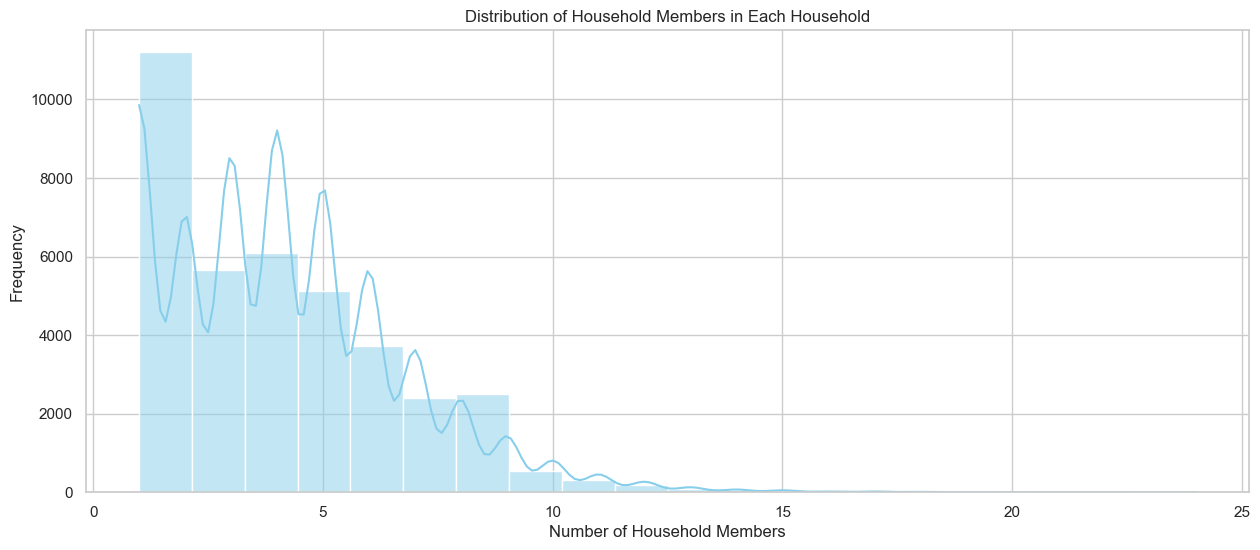

Top 10 Households with Highest Number of Household Members:


,Household_ID,Number_of_household_members
0,1421 127,24.0
1,260 7,22.0
2,261 62,22.0
3,46 114,21.0
4,293 60,21.0
5,97 32,19.0
6,246 26,19.0
7,301 28,19.0
8,43 46,18.0
9,72 3,18.0


In [19]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting the distribution
plt.figure(figsize=(15, 6))
sns.histplot(df_cleaned_dropped['Number_of_household_members'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Household Members in Each Household')
plt.xlabel('Number of Household Members')
plt.ylabel('Frequency')
plt.show()

# Identify the top ten households
top_10_households = df_cleaned_dropped.groupby('Household_ID')['Number_of_household_members'].max().nlargest(10)

# Create a DataFrame from the top_10_households Series
top_10_df = top_10_households.reset_index()

# Print the DataFrame
print("Top 10 Households with Highest Number of Household Members:")
top_10_df

**ii) Distribution of number of children resident in each household**

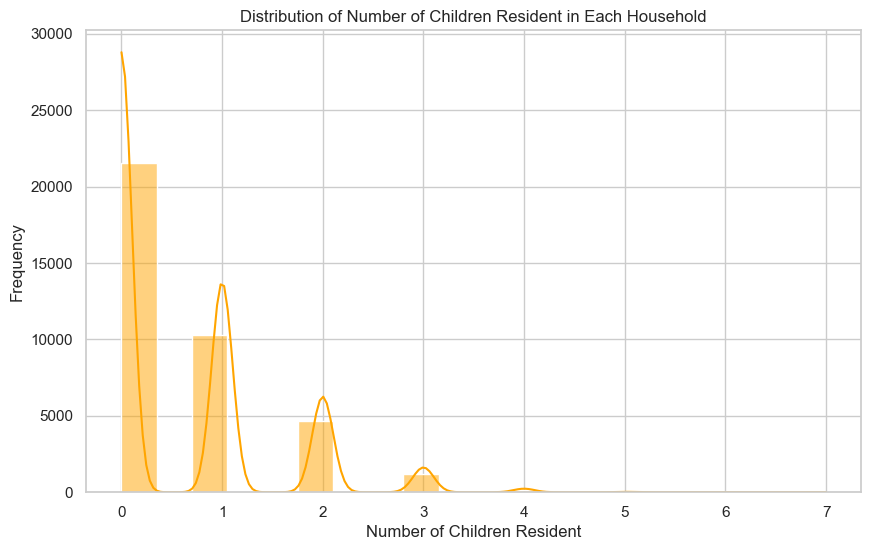

Top 20 Households with Highest Number of Children:


,Household_ID,Number_of_children_resident
0,264 52,7.0
1,74 5,6.0
2,302 47,6.0
3,861 67,6.0
4,175 32,5.0
5,216 12,5.0
6,231 1,5.0
7,246 29,5.0
8,286 24,5.0
9,288 14,5.0


In [20]:
# Identify the top 20 households based on the sum of 'Number_of_children_resident'
top_20_households = df_cleaned_dropped.groupby('Household_ID')['Number_of_children_resident'].sum().nlargest(10)

# Create a DataFrame from the top_20_households Series
top_20_df = top_20_households.reset_index()

# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned_dropped['Number_of_children_resident'], bins=20, kde=True, color='orange')
plt.title('Distribution of Number of Children Resident in Each Household')
plt.xlabel('Number of Children Resident')
plt.ylabel('Frequency')
plt.show()

# Print the DataFrame
print("Top 20 Households with Highest Number of Children:")
top_20_df

**iii) Distribution of number of de facto household members in each household**

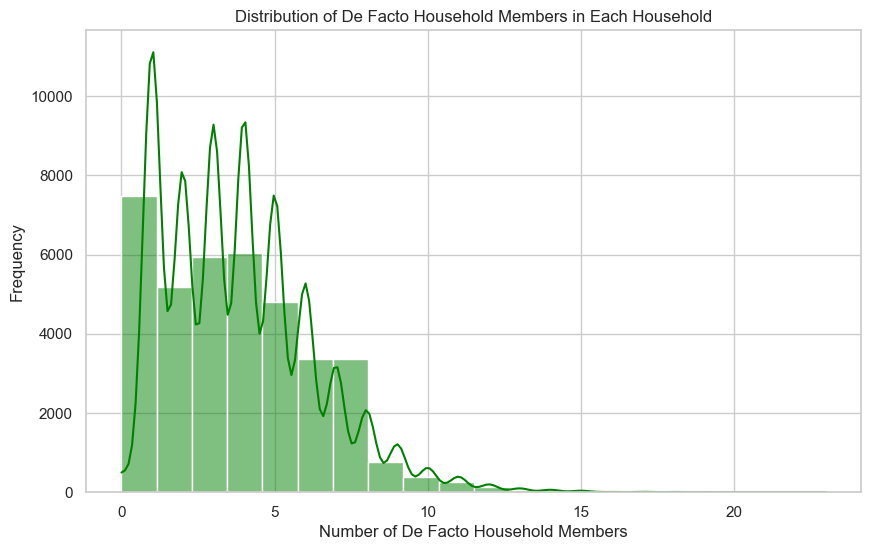

,Household_ID,Number_of_de_facto_household_members
0,1421 127,23.0
1,260 7,21.0
2,293 60,21.0
3,46 114,20.0
4,97 32,19.0
5,261 62,19.0
6,301 28,19.0
7,43 46,18.0
8,72 3,18.0
9,246 26,18.0


In [21]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned_dropped['Number_of_de_facto_household_members'], bins=20, kde=True, color='green')
plt.title('Distribution of De Facto Household Members in Each Household')
plt.xlabel('Number of De Facto Household Members')
plt.ylabel('Frequency')
plt.show()

# Identify the top 10 households based on the sum of 'Number_of_de_facto_household_members'
top_10_de_facto_households = df_cleaned_dropped.groupby('Household_ID')['Number_of_de_facto_household_members'].sum().nlargest(10)

# Create a DataFrame from the top_10_households Series
top_10_de_facto_households = top_10_de_facto_households.reset_index()

top_10_de_facto_households

**iv) Distribution of number of ever-married status in each household**

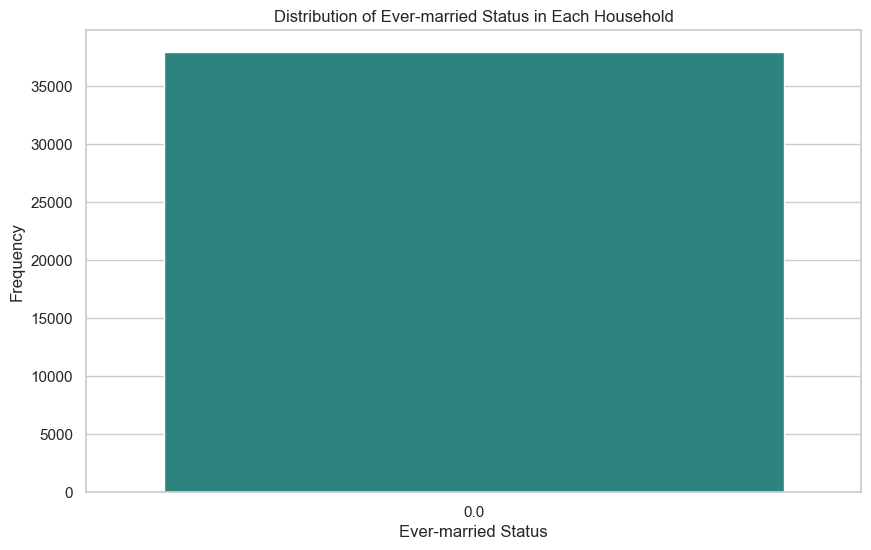

,Household_ID,Ever-married
0,1 4,0.0
1,1 7,0.0
2,1 10,0.0
3,1 13,0.0
4,1 17,0.0
5,1 20,0.0
6,1 23,0.0
7,1 26,0.0
8,1 36,0.0
9,1 39,0.0


In [22]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting the distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Ever-married', data=df_cleaned_dropped, palette='viridis')
plt.title('Distribution of Ever-married Status in Each Household')
plt.xlabel('Ever-married Status')
plt.ylabel('Frequency')
plt.show()

# Identify the top 10 households based on the sum of 'ever-married'
top_10_ever_married_households = df_cleaned_dropped.groupby('Household_ID')['Ever-married'].sum().nlargest(10)

# Create a DataFrame from the top_10_households Series
top_10_ever_married_households = top_10_ever_married_households.reset_index()

top_10_ever_married_households

In [23]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Reset the index to ensure 'highest_edu_level' is a single-level column
df_reset_index = df_cleaned_dropped.reset_index()

# Plotting the distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='highest_edu_level', data=df_reset_index, order=df_reset_index['highest_edu_level'].value_counts().index, palette='muted')
plt.title('Distribution of Highest Education Level in Each Household')
plt.xlabel('Highest Education Level')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Creating a dataframe for the top ten households
top_10_education = df_reset_index.groupby('highest_edu_level')['Household_ID'].count().reset_index(name='Frequency').nlargest(10, 'Frequency')

# Display the top 10 education levels
print(top_10_education)

ValueError: Grouper for 'highest_edu_level' not 1-dimensional

<Figure size 1200x600 with 0 Axes>

In [24]:
df_cleaned_dropped['highest_edu_level'].head(20)

,highest_edu_level,highest_edu_level
0,1.0,2.0
1,1.0,2.0
2,1.0,2.0
3,1.0,2.0
4,1.0,2.0
5,1.0,2.0
6,1.0,1.0
7,1.0,2.0
8,1.0,2.0
9,1.0,1.0


**v) Distribution of number of current and previous marital status in each household**

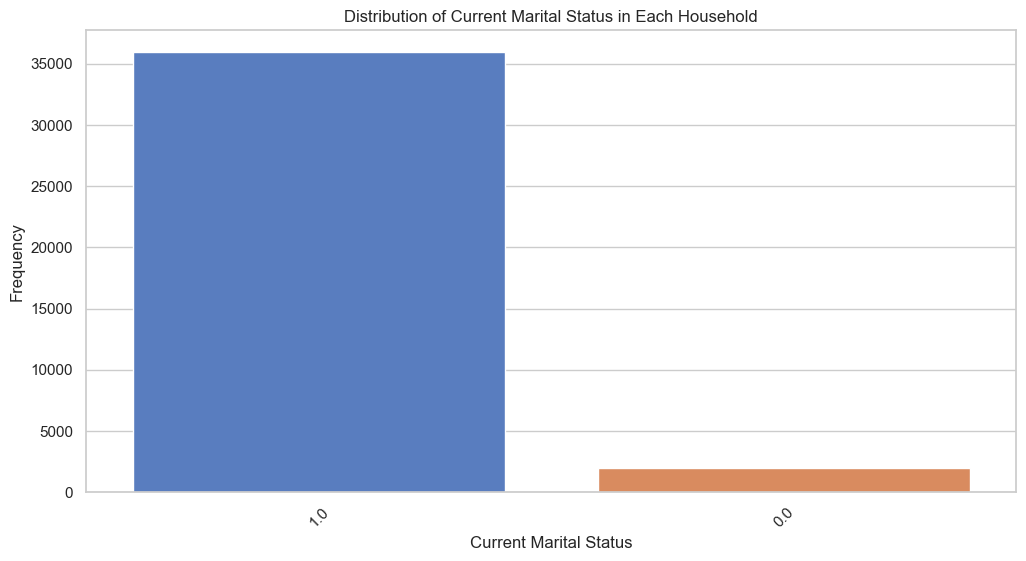

   curr_marital_status  Frequency
1                  1.0      35939
0                  0.0       1972


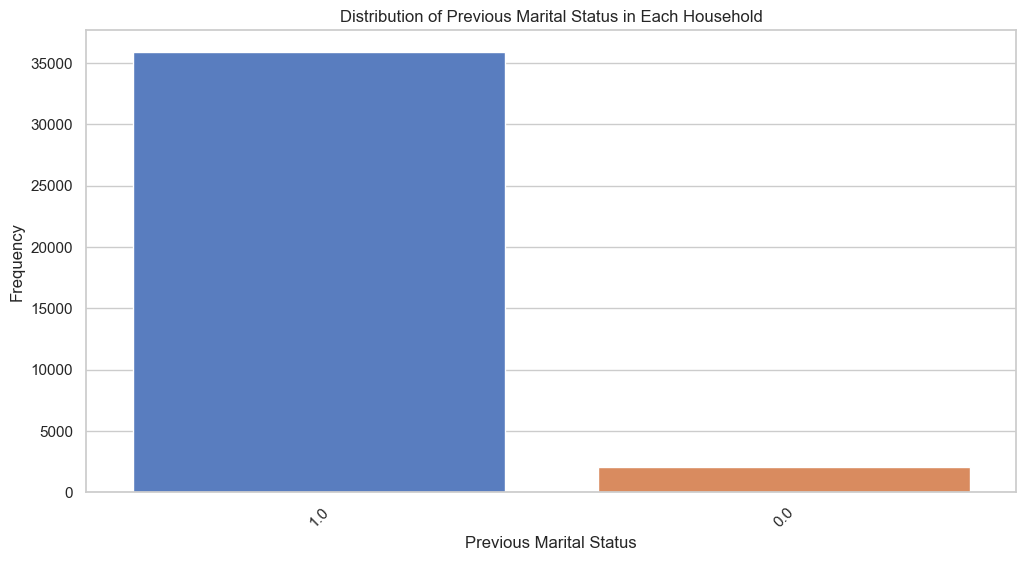

,marital_status,Frequency
1,1.0,35884
0,0.0,2027


In [25]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting the distribution of current marital status
plt.figure(figsize=(12, 6))
sns.countplot(x='curr_marital_status', data=df_cleaned_dropped, order=df_cleaned_dropped['curr_marital_status'].value_counts().index, palette='muted')
plt.title('Distribution of Current Marital Status in Each Household')
plt.xlabel('Current Marital Status')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Creating a dataframe for the top ten households based on current marital status
top_10_curr_marital_status = df_cleaned_dropped.groupby('curr_marital_status')['Household_ID'].count().reset_index(name='Frequency').nlargest(10, 'Frequency')

# Display the top 10 current marital status
print(top_10_curr_marital_status)

# Plotting the distribution of previous marital status
plt.figure(figsize=(12, 6))
sns.countplot(x='marital_status', data=df_cleaned_dropped, order=df_cleaned_dropped['marital_status'].value_counts().index, palette='muted')
plt.title('Distribution of Previous Marital Status in Each Household')
plt.xlabel('Previous Marital Status')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Creating a dataframe for the top ten households based on previous marital status
top_10_prev_marital_status = df_cleaned_dropped.groupby('marital_status')['Household_ID'].count().reset_index(name='Frequency').nlargest(10, 'Frequency')

# Display the top 10 previous marital status
top_10_prev_marital_status

## b) Water and Sanitation

Here, we shall explore the following main source of drinking water, type of toilet facility, household treats drinking water and toilet sharing.

**i) Distribution of main source of drinking water in each household**

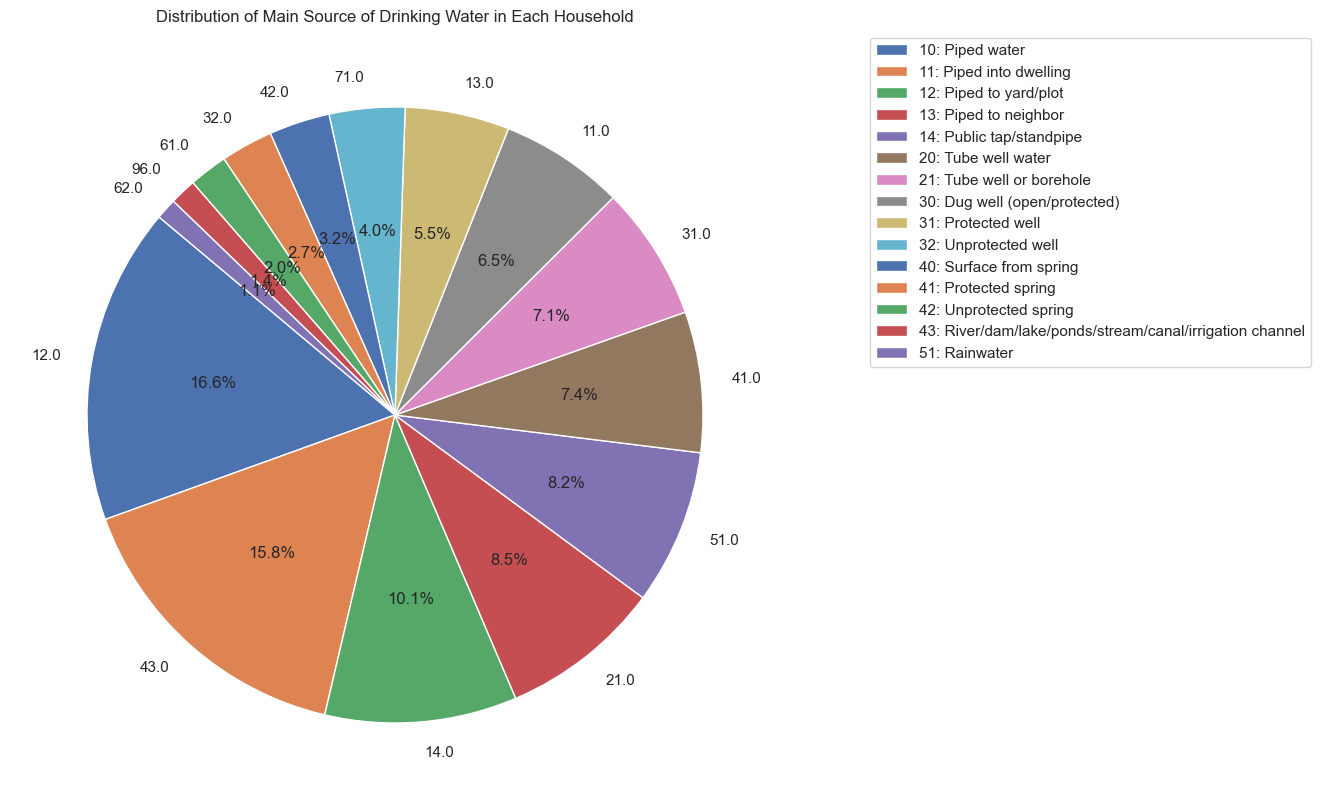

,Main_source_drink_water,Frequency
1,12.0,6300
9,43.0,6001
3,14.0,3820
4,21.0,3214
10,51.0,3090
7,41.0,2798
5,31.0,2673
0,11.0,2474
2,13.0,2076
13,71.0,1504


In [26]:
# Mapping of codes to labels
source_water_mapping = {
    10: 'Piped water',
    11: 'Piped into dwelling',
    12: 'Piped to yard/plot',
    13: 'Piped to neighbor',
    14: 'Public tap/standpipe',
    20: 'Tube well water',
    21: 'Tube well or borehole',
    30: 'Dug well (open/protected)',
    31: 'Protected well',
    32: 'Unprotected well',
    40: 'Surface from spring',
    41: 'Protected spring',
    42: 'Unprotected spring',
    43: 'River/dam/lake/ponds/stream/canal/irrigation channel',
    51: 'Rainwater',
    61: 'Tanker truck',
    62: 'Cart with small tank',
    71: 'Bottle water',
    96: 'Other'
}

# Get the distribution of the main source of drinking water
source_water_distribution = df_cleaned_dropped['Main_source_drink_water'].value_counts()

# Create a pie chart with a custom legend
plt.figure(figsize=(10, 10))
plt.pie(source_water_distribution, labels=source_water_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Main Source of Drinking Water in Each Household')

# Add a custom legend
legend_labels = [f"{code}: {label}" for code, label in source_water_mapping.items()]
plt.legend(legend_labels, loc='upper right', bbox_to_anchor=(1.7, 1))

plt.show()

# Create a dataframe for the top fifteen households based on the main source of drinking water
top_15_source_water = df_cleaned_dropped.groupby('Main_source_drink_water')['Household_ID'].count().reset_index(name='Frequency').nlargest(15, 'Frequency')

# Display the top 15 main sources of drinking water
top_15_source_water

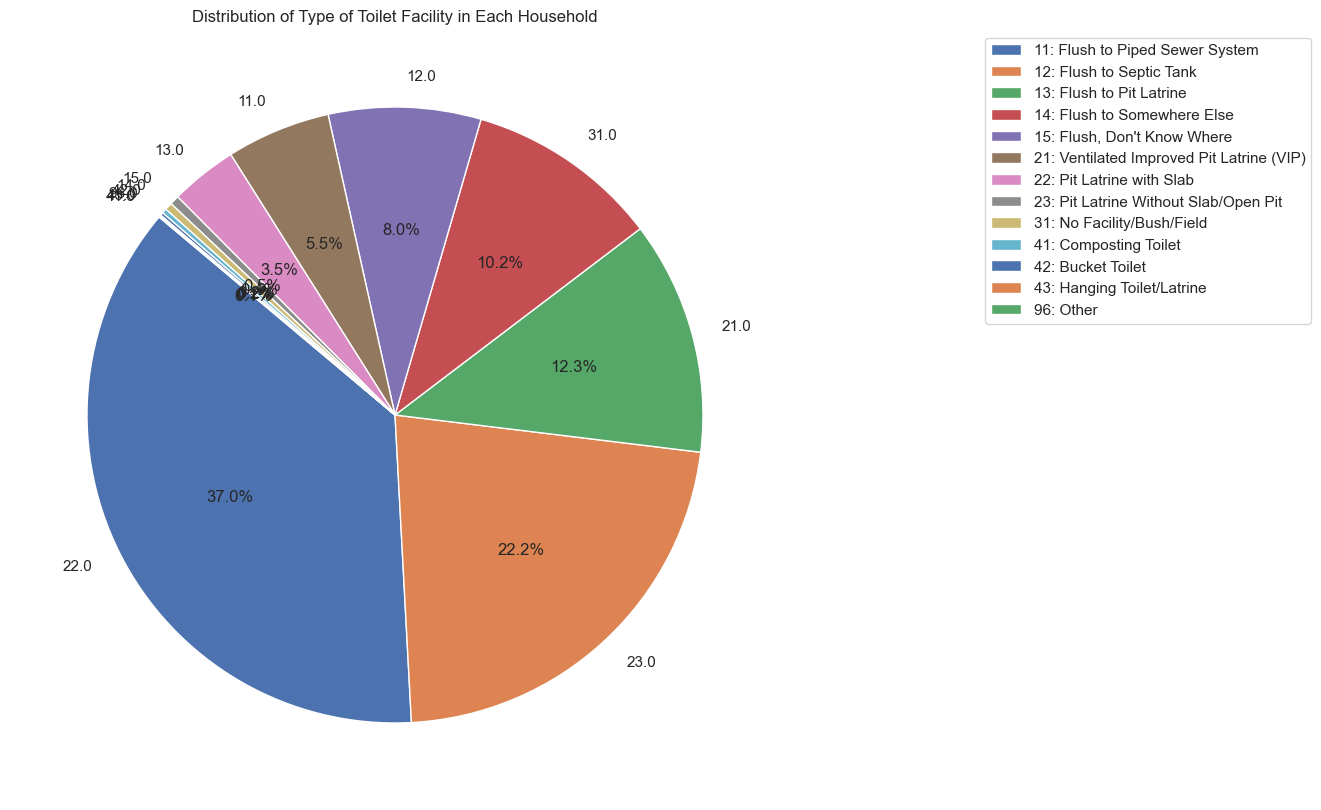

,Type_toilet_facility,Frequency
6,22.0,14012
7,23.0,8424
5,21.0,4652
8,31.0,3849
1,12.0,3031
0,11.0,2073
2,13.0,1333
4,15.0,186
3,14.0,149
10,42.0,94


In [27]:
# Create a dictionary to map numeric codes to descriptive labels
toilet_facility_legend = {
    10: 'Flush Toilet',
    11: 'Flush to Piped Sewer System',
    12: 'Flush to Septic Tank',
    13: 'Flush to Pit Latrine',
    14: 'Flush to Somewhere Else',
    15: 'Flush, Don\'t Know Where',
    20: 'Pit Toilet Latrine',
    21: 'Ventilated Improved Pit Latrine (VIP)',
    22: 'Pit Latrine with Slab',
    23: 'Pit Latrine Without Slab/Open Pit',
    30: 'No Facility',
    31: 'No Facility/Bush/Field',
    41: 'Composting Toilet',
    42: 'Bucket Toilet',
    43: 'Hanging Toilet/Latrine',
    96: 'Other'
}

# Get the distribution of the type of toilet facility
toilet_facility_distribution = df_cleaned_dropped['Type_toilet_facility'].value_counts()

# Create a pie chart with a custom legend
plt.figure(figsize=(10, 10))
plt.pie(toilet_facility_distribution, labels=toilet_facility_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Type of Toilet Facility in Each Household')

# Add a custom legend
legend_labels = [f"{code}: {label}" for code, label in toilet_facility_legend.items() if code in toilet_facility_distribution.index]
plt.legend(legend_labels, loc='upper right', bbox_to_anchor=(1.7, 1))

plt.show()

# Create a dataframe for the top sixteen households based on the type of toilet facility
toilet_facility_distribution_top16 = df_cleaned_dropped.groupby('Type_toilet_facility')['Household_ID'].count().reset_index(name='Frequency').nlargest(16, 'Frequency')

# Display the top 16 type of toilet facility
toilet_facility_distribution_top16

## c) Housing Conditions

## d) Ownership of Assets

## e) Wealth Index and Urban/Rural Status

## f) Healthcare Access and Aid

## g) Covid-19 Related Information

## 2.4) Building Model

* Model Interpretability and Explainability:

Enhance model interpretability to provide actionable insights for decision-makers by employing techniques such as SHAP values or feature importance analysis.


## 2.5) Conclusion

## 2.6) Recommendation

## 2.7) Model Deployment